## GRIP - THE SPARKS FOUNDATION  
[DATA SCIENCE & BUSINESS ANALYTICS]

   ###                           - REDDI SRIJA R

### TASK #1 : PREDICTION USING SUPERVISED ML

   ### Objective: To predict the percentage of an student based on the number of study hours.

### Importing necessary librabries

    "Pandas" for dataframes 
    "Numpy" for numerical computation 
    "sklearn" for data models
    "train_test_split" for splitting the dataset
    "Matplotlib" for visualization

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as viz
from sklearn.linear_model import LinearRegression

#### Importing the dataset of Task #1

In [2]:
supervised_linear = pd.read_csv("Task 1.csv")

In [3]:
supervised_linear.head()

,Hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
supervised_linear.columns

Index(['Hours', 'scores'], dtype='object')

In [5]:
supervised_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data cleaning

In [6]:
supervised_linear.isnull().sum()

Hours     0
scores    0
dtype: int64

No null values results in no further alteration to the dataframe

### Getting summary statistics for numerical columns in our dataframe

In [7]:
supervised_linear.describe()

,Hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Scatter plot visualization

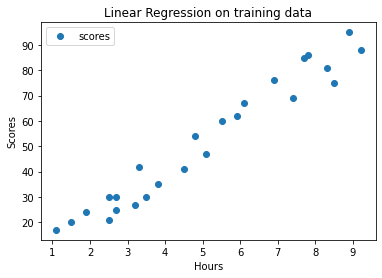

In [8]:
supervised_linear.plot(x = 'Hours', y = 'scores', style = 'o')

viz.title("Linear Regression on training data")
viz.xlabel("Hours")
viz.ylabel("Scores")

viz.show()

### Data splitting

    Splitting the dataset into training and testing dataset with 80:20 ratio respectively.  
    Set random_state = 42 to control the shuffling process

In [9]:
X = supervised_linear.iloc[:,0].values.reshape(-1,1)
y = supervised_linear.iloc[:,-1].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Model fitting
Traing the model with training dataset

In [10]:
srija = LinearRegression() 
srija.fit(X_train, y_train)

LinearRegression()

#### Finding slope and intercept

In [11]:
y_inter = srija.coef_*X + srija.intercept_

print("Slope :", srija.coef_)
print("Intercept :",srija.intercept_)

Slope : [[9.68207815]]
Intercept : [2.82689235]


#### Fitting the Regression line

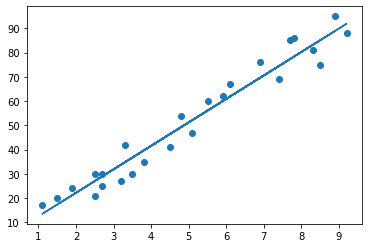

In [12]:
viz.scatter(X, y)
viz.plot(X, y_inter);
viz.show()

### Introducing test dataset to make the model predict the output

In [13]:
#To predict the percentage of scores based on the number of hours studied
y_pred = srija.predict(X_test)
print(y_test)

[[81]
 [30]
 [21]
 [76]
 [62]]


### Comparison between actual values of dataset and predicted values from model when test dataset was introduced.

In [14]:
# actual vs predicted
a = y_test.tolist()
b = y_pred.tolist()
ap = pd.DataFrame({'Actual':a, 'Predicted':b})

In [15]:
ap

,Actual,Predicted
0,[81],[83.18814103588203]
1,[30],[27.03208774003898]
2,[21],[27.03208774003898]
3,[76],[69.63323161964405]
4,[62],[59.951153465188355]


### To predict score if a student studied for 9.25 hrs/day

In [16]:
hours_studied = np.array([9.25]).reshape(-1,1)
prediction = srija.predict(hours_studied)
print("No of Hours = {}".format(hours_studied))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = [[9.25]]
Predicted Score = [92.38611528]


### Evaluation of model

    Mean Absolute Error - the lower the better [close to 0]
    Mean Squared Error - the lower the better [close to 0]
    Root Mean Square Error - between 0.2 and 0.5
    R^2 score - the higher the better [close to 1]
    Adjusted R^2 Score -  above 0.9

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

3.9207511902099244


In [18]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

18.943211722315272


In [19]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(rmse)

4.352380006653288


In [20]:
from sklearn.metrics import r2_score
r2_sc = r2_score(y_test, y_pred)
print("R^2 score is: ", r2_sc)

R^2 score is:  0.9678055545167994


In [21]:
n = len(y_test)
k = len((X_test))
adj_r2_sc = 1-(((1-r2_sc)*(n-1))/(n-k-1))
print(adj_r2_sc)

1.1287777819328024


Total execution time of our model

In [22]:
import time
start = time.time()
x = 0
for r in range(1000000):
    x += 1
time.sleep(3)
end = time.time()
execution = end - start
print("Execution time:", execution, "seconds." )

Execution time: 3.136366844177246 seconds.


### THANK YOU!